In [1]:
# %% === < Global Setting: Time and Seed > ===
import time
import numpy as np
local_time = time.strftime("%Y%m%d_%H%M%S", time.localtime(time.time()))
print("Local Time (UTC+8):", local_time)
seed = int(round(1000000*np.random.random()))
print("Seed:", seed)
np.random.seed(seed)

Local Time (UTC+8): 20210608_030006
Seed: 250770


In [2]:
# %% === < One Windowed Image I/O > ===
import os
import numpy as np
from pydicom import dcmread

filename = 'Data/TrainingData/epidural/ID_000edbf38.dcm'
ds = dcmread(filename)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.206814471935657663692628708806004205261
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_000edbf38
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_e251d7a5'
(0020, 000d) Study Instance UID                  UI: ID_bf9768375b
(0020, 000e) Series Instance UID                 UI: ID_575894ff37
(0020, 0010) Study ID                            SH: '

In [3]:
print('WindowCenter: {}'.format(ds.WindowCenter))
print('WindowWidth: {}'.format(ds.WindowWidth))
print('RescaleIntercept: {}'.format(ds.RescaleIntercept))
print('RescaleSlope: {}'.format(ds.RescaleSlope))

WindowCenter: 30
WindowWidth: 80
RescaleIntercept: -1024
RescaleSlope: 1


In [4]:
import matplotlib.pyplot as plt
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]]


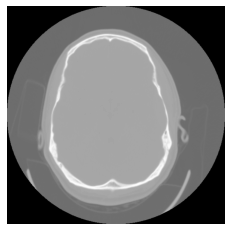

[[-1023 -1023 -1023 ... -1023 -1023 -1023]
 [-1023 -1023 -1023 ... -1023 -1023 -1023]
 [-1023 -1023 -1023 ... -1023 -1023 -1023]
 ...
 [-1023 -1023 -1023 ... -1023 -1023 -1023]
 [-1023 -1023 -1023 ... -1023 -1023 -1023]
 [-1023 -1023 -1023 ... -1023 -1023 -1023]]


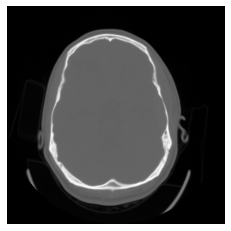

In [5]:
print(ds.pixel_array)
plt.figure()
plt.imshow(ds.pixel_array, cmap='gray')
plt.axis('off')
plt.show()

dcm = ds.pixel_array.copy()
dcm[dcm < ds.RescaleSlope] = ds.RescaleSlope
dcm = ds.RescaleIntercept + dcm*ds.RescaleSlope
dcm = dcm.astype(np.int16)
print(dcm)
plt.figure()
plt.imshow(dcm, cmap='gray')
plt.axis('off')
plt.show()

512 512


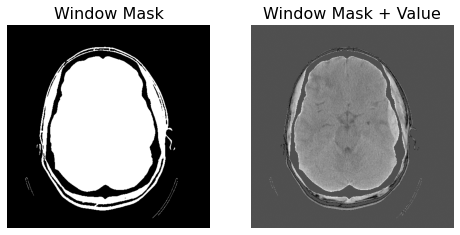

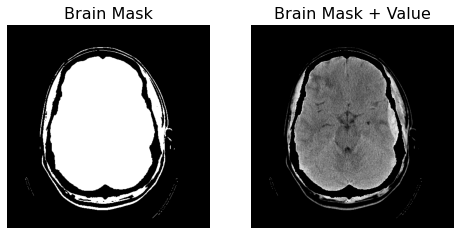

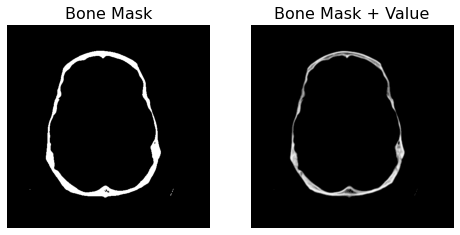

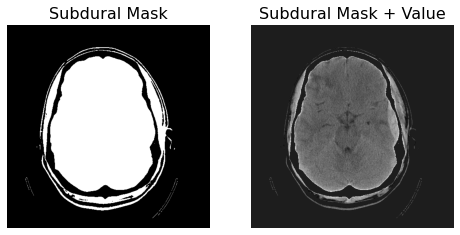

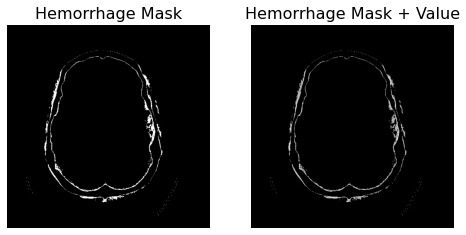

In [6]:
len_row = ds.Rows
len_col = ds.Columns
print(len_row,len_col)

# === window window
mask_window = np.ones([len_row,len_col])
mask_window[dcm < ds.WindowCenter-ds.WindowWidth] = 0
mask_window[dcm > ds.WindowCenter+ds.WindowWidth] = 0
value_window = (dcm*mask_window)
# value_window = (dcm*mask_window).astype(np.uint8)
plt.figure(figsize=(8,16))
for idx in range(2):
    ax = plt.subplot(1, 2, idx + 1)
    if idx == 0:
        plt.imshow(mask_window, cmap='gray')
        plt.title('Window Mask')
        plt.axis('off')
    elif idx == 1:
        plt.imshow(value_window, cmap='gray')
        plt.title('Window Mask + Value')
        plt.axis('off')

# === brain window
mask_brain = np.ones([len_row,len_col])
mask_brain[dcm < 0] = 0
mask_brain[dcm > 80] = 0
value_brain = (dcm*mask_brain)
# value_brain = (dcm*mask_brain).astype(np.uint8)
plt.figure(figsize=(8,16))
for idx in range(2):
    ax = plt.subplot(1, 2, idx + 1)
    if idx == 0:
        plt.imshow(mask_brain, cmap='gray')
        plt.title('Brain Mask')
        plt.axis('off')
    elif idx == 1:
        plt.imshow(value_brain, cmap='gray')
        plt.title('Brain Mask + Value')
        plt.axis('off')
        
# === bone window
mask_bone = np.ones([len_row,len_col])
mask_bone[dcm < 300] = 0
value_bone = (dcm*mask_bone)
# value_bone = (dcm*mask_bone).astype(np.uint8)
plt.figure(figsize=(8,16))
for idx in range(2):
    ax = plt.subplot(1, 2, idx + 1)
    if idx == 0:
        plt.imshow(mask_bone, cmap='gray')
        plt.title('Bone Mask')
        plt.axis('off')
    elif idx == 1:
        plt.imshow(value_bone, cmap='gray')
        plt.title('Bone Mask + Value')
        plt.axis('off')
        
# === subdural window
mask_subdural = np.ones([len_row,len_col])
mask_subdural[dcm < -15] = 0
mask_subdural[dcm > 115] = 0
value_subdural = (dcm*mask_subdural)
# value_subdural = (dcm*mask_subdural).astype(np.uint8)
plt.figure(figsize=(8,16))
for idx in range(2):
    ax = plt.subplot(1, 2, idx + 1)
    if idx == 0:
        plt.imshow(mask_subdural, cmap='gray')
        plt.title('Subdural Mask')
        plt.axis('off')
    elif idx == 1:
        plt.imshow(value_subdural, cmap='gray')
        plt.title('Subdural Mask + Value')
        plt.axis('off')

# === hemorrhage window
mask_hemorrhage = np.ones([len_row,len_col])
mask_hemorrhage[dcm < 65] = 0
mask_hemorrhage[dcm > 100] = 0
value_hemorrhage = (dcm*mask_hemorrhage)
# value_hemorrhage = (dcm*mask_hemorrhage).astype(np.uint8)
plt.figure(figsize=(8,16))
for idx in range(2):
    ax = plt.subplot(1, 2, idx + 1)
    if idx == 0:
        plt.imshow(mask_hemorrhage, cmap='gray')
        plt.title('Hemorrhage Mask')
        plt.axis('off')
    elif idx == 1:
        plt.imshow(value_hemorrhage, cmap='gray')
        plt.title('Hemorrhage Mask + Value')
        plt.axis('off')
        
# # === hemorrhage 2-week window
# mask_hemorrhage_2w = np.ones([len_row,len_col])
# mask_hemorrhage_2w[dcm < 35] = 0
# mask_hemorrhage_2w[dcm > 40] = 0
# value_hemorrhage_2w = (dcm*mask_hemorrhage_2w).astype(np.uint8)
# plt.figure(figsize=(8,16))
# for idx in range(2):
#     ax = plt.subplot(1, 2, idx + 1)
#     if idx == 0:
#         plt.imshow(mask_hemorrhage_2w, cmap='gray')
#         plt.title('Hemorrhage (2-Week) Mask')
#         plt.axis('off')
#     elif idx == 1:
#         plt.imshow(value_hemorrhage_2w, cmap='gray')
#         plt.title('Hemorrhage (2-Week) Mask + Value')
#         plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


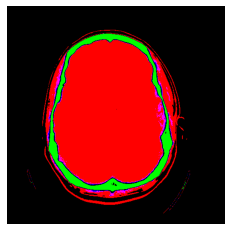

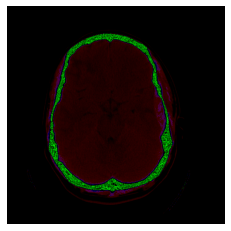

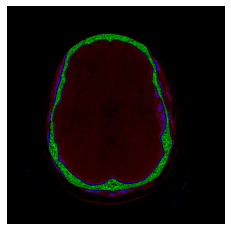

In [7]:
import cv2
R = value_hemorrhage
G = value_bone
B = value_brain

img = cv2.merge([B,G,R])
print(img.shape)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

img = cv2.merge([B,G,R]).astype(np.uint8)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

img = cv2.merge([B,G,2*R]).astype(np.uint8)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()